# Plano inclinado oscilante
© 2020 Víctor A. Bettachini  
Mecánica General  
Departamento de Ingeniería e Investigación Tecnológica  
Universidad Nacional de La Matanza   
![](ambos.png "UNLaM | DIIT")  

---

## Enunciado

Sobre la superficie inclinada en $\theta_0$ del carro de masa $m_0$ rueda sin deslizar un disco de radio $R$ y masa $m$.
Este no se sale de la superficie a pesar de que al centro del mismo se aplica una fuerza $\vec{F}= F(t) \hat{x}$ gracias a un resorte de constante elástica $K_1$ que une este centro con el carro.
Limita el alcance de este un resorte de constante elástica $K_2$ fijado a la pared y un amortiguador proporcional a la velocidad de constante proporcional $b$.
Se descarta la fricción del carro con el suelo.
Ambos resortes tienen originalmente su longitud de equilibrio $l_{10}$ y $l_{20}$.
Todo el sistema está sometido a la aceleración gravitatoria $\vec{g}= - g \hat{y}$.

![](pset7ex6.png)  

Pregunta conceptual: ¿Qué es la fuerza generalizada asociada al desplazamiento virtual $\delta x$ debida a $\vec{F}$?
1. $F(t) \cos(\theta)$
1. $F(t)$
1. $F(t) \delta x$
1. $0$

Obtenga las ecuaciones de la dinámica de Euler-Lagrange.

## Resolución simbólica en el formalismo Lagrangiano

In [1]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

### Parámetros del sistema

In [2]:
# Defino los parámetros físicos del sistema
# theta0: inclinación del plano
g, m0, m, R, K1, K2, b, theta0 = sym.symbols('g, m_0, m, R, K_1, K_2, b, theta_0', positive=True)

### Coordenadas generalizadas

Describiré la posición de
- punto C en el carro, inicialmente en $x=0$ y una altura sobre el piso que se mantiene constante
- centro del cilindro en el plano


In [3]:
# longitudes auxiliares
# li0: longitud de reposo resorte i
# hC: altura punto C respecto al piso
# h2: altura punto de sujeción del resorte 2 por sobre punto C 
# eC: espesor que separa C de su borde izquierdo donde conectan resorte 1 y amortiguador.
eC, hC, h2, l10, l20 = sym.symbols('e_C, h_C, h_2, l_{10}, l_{20}', positive=True)

In [4]:
# Defino coordenadas generalizadas 
t = sym.Symbol('t') # tiempo
x = sym.Function('x')(t) # lado izquierdo carro C
X1 = sym.Function('X_1')(t) # centro cilindro cilindro

In [5]:
# Sistema cartesiano
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas

# posiciones
m0_C_r = x* N.x + hC* N.y # punto C carro
res2_sujecion = m0_C_r + h2* N.y # punto de sujeción del resorte 2
m_r = res2_sujecion + X1*( sym.cos(theta0)* N.x + (-sym.sin(theta0)* N.y) ) # centro cilindro

### Energía cinética y potencial

Como el momentos de inercia de un cilindro homogéneos en torno a eje de simetría es

$$
I = \frac{m}{2} R^2,
$$
el término de energía cinético relacionado a su rotación es

$$
\frac{I}{2} \dot{\theta}^2 = \frac{m}{4} \left( \dot{\theta} R \right)^2 =  \frac{m}{4} \left( \dot{x} \right)^2,
$$
si $x$ es el recorrido que hace al rodar con $\dot{\theta}$.

In [6]:
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5

# traslación del carro
m0_C_v = m0_C_r.diff(t, N)
m0_Ttraslacion = unMedio* m0* m0_C_v.dot(m0_C_v)

# traslación del cilindro
m_v = m_r.diff(t, N)
m_Ttraslacion = unMedio* m* m_v.dot(m_v)

# rotación del cilindro
m_Trotacion = unMedio* unMedio* m* m_v.dot(m_v)

T = m0_Ttraslacion+ m_Ttraslacion+ m_Trotacion
cineticaSimbolo = sym.Symbol('T')
sym.Eq(cineticaSimbolo, T.simplify() ) # simplify: simplifica usando factor común y otras operaciones

In [7]:
# potencial gravitatoria
m_gravitatoria = m* g* m_r.dot(N.y)

# elástica resorte 1
resorte1_V = unMedio* K1* (l10+ X1)**2

# elástica resorte 2
resorte2_V = unMedio* K2* (l20+ x)**2

V = m_gravitatoria+ resorte1_V + resorte2_V
potencialSimbolo = sym.Symbol('V')
sym.Eq(potencialSimbolo, V.simplify() )

### Lagrangiano

In [8]:
lagrangianoSimbolo = sym.Symbol('\mathcal{L}')
L = T- V
sym.Eq(lagrangianoSimbolo, L.simplify())

### Fuerzas no conservativas

Hay dos coordenadas generalizada, $q_i = x, X_1$, así que las habrá que obtener dos $Q_i$.
Estas puden obtenerse siguiendo 

$$
\boxed{
Q_i \delta q_i = \sum_j \vec{F}_j \cdot \left( \frac{\partial \vec{r}_j}{\partial q_j} \right) \delta q_j,
}
$$
donde habrá dos fuerzas $\vec{F}_j$, la del amortiguador y la $\vec{F}(t)$ aplicada sobre el centro del cilindro.
Es el desplazamiento de los puntos $\vec{r}_j$ en que se aplica cada $\vec{F}_j$ el trabajo que afecta al sistema.

La $\vec{F}_\mathrm{amortiguador}$

In [9]:
amortiguadorFuerza_vectorial = -b* m0_C_v.dot(N.x) * N.x
amortiguadorFuerza_vectorial

se aplica a un costado del carro, que al ser rígido, tiene posición es solidaria a su punto C en

In [10]:
m0_C_r

que solo puede derivarse respecto a la coordenada $x$.

Por el contrario la fuerza externa $F(t)$ 

In [11]:
F = sym.Function('F')(t)
F_vectorial = F* N.x
F_vectorial

aplicada en el centro del cilindro

In [12]:
m_r

presenta dependencia en ambas coordenadas $x, X_1$

Para calcular los $Q_i$ basta con realizar los productos escalares (producto punto) de los vectores de las fuerzas con la derivada de las posiciones de los puntos en que se aplican respecto a cada coordenada generalizadas.

In [13]:
x_Q = amortiguadorFuerza_vectorial.dot( m0_C_r.diff(x,N) ) + F_vectorial.dot( m_r.diff(x,N) )
x_Qsimbolo = sym.Symbol('Q_x')
sym.Eq(x_Qsimbolo, x_Q)

Se hace lo análogo para $Q_{X_1}$

In [14]:
X1_Q = amortiguadorFuerza_vectorial.dot( m0_C_r.diff(X1,N) ) + F_vectorial.dot( m_r.diff(X1,N) )
X1_Qsimbolo = sym.Symbol('Q_{X_1}')
sym.Eq(X1_Qsimbolo, X1_Q)

### Euler-Lagrange

$$
\boxed{
    \frac{\partial}{\partial q_i} \mathcal{L}
    - \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}_i} \mathcal{L}
    + \sum_j \lambda_j \frac{\partial}{\partial q_i}  f_j
    + Q_i
    = 0
}.
$$

In [15]:
x_dq = L.diff(x)
x_dtdqp = L.diff(x.diff(t) ).diff(t)
x_EL_val = x_dq- x_dtdqp+ x_Q
x_EL = sym.Eq(x_EL_val.simplify(), 0)

X1_dq = L.diff(X1)
X1_dtdqp = L.diff(X1.diff(t) ).diff(t)
X1_EL_val = X1_dq - X1_dtdqp+ X1_Q
X1_EL = sym.Eq(X1_EL_val.simplify(), 0)

sistemaEcuacionesEL = [x_EL, X1_EL]

In [16]:
sistemaEcuacionesEL[0]

In [17]:
sistemaEcuacionesEL[1]

## Ecuaciones de la dinámica

Del sistema de ecuaciones de Euler-Lagrange pueden despejarse las aceleraciones generalizadas.

In [18]:
variblesDespeje = [x.diff(t,2,), X1.diff(t,2,)]
variblesDespeje_sol= sym.nonlinsolve(sistemaEcuacionesEL, variblesDespeje ).args[0]
variblesDespeje_sol= [variable.simplify() for variable in variblesDespeje_sol]

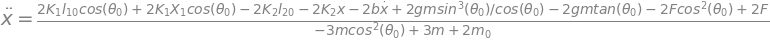

In [19]:
sym.Eq(x.diff(t,2), variblesDespeje_sol[0])

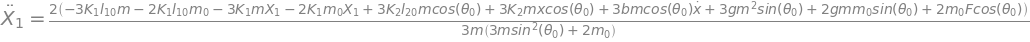

In [20]:
sym.Eq(X1.diff(t,2), variblesDespeje_sol[1])